# Analysis of the Online Shopping in Retail Dataset

This notebook involves gaining deeper insights into the dataset to identify patterns/trends that were not visible from the previous analysis.By gaining deepere insights, management can  make more informed decisions about changes to the website and marketng strategies.

## Task 1: What are the customers doing?

Management would like a general overview of the performance of the website. They would like the following questions answered.

#### Are the sales happening proportionally on weekends?

In [1]:
import pandas as pd

# First we need to load the relevant data frame
df=pd.read_csv('modified_customer_activity.csv')

# Next we need to filter the dataframe to show only rows where revenue was generated
fd=df[df['revenue'] == True]

# Now we can see what proprtion of the revenue was generated on the weekend
print("The number of sales occuring on the weekend:")
fd['weekend'].value_counts()




The number of sales occuring on the weekend:


weekend
False    1477
True      432
Name: count, dtype: int64

This shows the sales are proportioanlly happening more on the weekdays rather than the weekends

#### Which regions are generating the most revenue currently?

In [2]:
print("The regions which generate the most revenue:")
fd['region'].value_counts()

The regions which generate the most revenue:


region
North America      753
Western Europe     323
Eastern Europe     195
Asia               187
South America      130
Africa             130
Northern Africa     91
Oceania             51
Southern Africa     49
Name: count, dtype: int64

The regions generating the most revenue are North America and Western Europe.

#### Is there any particular website traffic that stands out when generating sales?

In [3]:
print("The website traffic that generates the most sales:")
fd['traffic_type'].value_counts()


The website traffic that generates the most sales:


traffic_type
Google search          875
Facebook ads           266
Bing search            173
Instagram ads          172
Youtube channel         89
Affiliate marketing     83
Twitter                 65
Youtube ads             54
Instagram Page          46
Tik Tok ads             37
Direct Traffic          24
Facebook page           12
Yahoo Search             4
Newsletter               3
Other                    2
Tik Tok page             2
Yandex search            1
Pinterest                1
Name: count, dtype: int64

The website traffic that stands out the most when generating the most sales is Google search

#### What is the breakdown of months making the most sales?

In [4]:
print("The months which generate the most sales:")
fd['month'].value_counts()

The months which generate the most sales:


month
Nov     740
May     342
Dec     274
Mar     181
Oct     133
Aug      74
Sep      71
Jul      67
June     21
Feb       6
Name: count, dtype: int64

Above we can see a breakdown of the months where the most sales where generated.

#### What percentage of time is spent on the website performing administrative/product or informational related tasks?

In [5]:
#First we need to convert the duration columns to  a timedelta data type
df['administrative_duration']=pd.to_timedelta(df['administrative_duration'])
df['informational_duration']=pd.to_timedelta(df['informational_duration'])
df['product_related_duration']=pd.to_timedelta(df['product_related_duration'])

#  Next we can create a column that shows the total duration of all tasks
df['total_duration']=df['administrative_duration']+df['informational_duration']+df['product_related_duration']

# Now we can create columns that calculate the percentage of time spent on each task
df['percentage_of_ad']=(df['administrative_duration']/df['total_duration'])*100
df['percentage_of_id']=(df['informational_duration']/df['total_duration'])*100
df['percentage_of_prd']=(df['product_related_duration']/df['total_duration'])*100

print("The percentage of time spent on administration,infomational and product related tasks:")
print("\n")
print(df[['percentage_of_ad','percentage_of_id','percentage_of_prd']])



The percentage of time spent on administration,infomational and product related tasks:


       percentage_of_ad  percentage_of_id  percentage_of_prd
0                   NaN               NaN                NaN
1                   NaN               NaN                NaN
2            100.000000          0.000000           0.000000
3                   NaN               NaN                NaN
4                   NaN               NaN                NaN
...                 ...               ...                ...
12325         37.384221         31.307890          31.307890
12326        100.000000          0.000000           0.000000
12327               NaN               NaN                NaN
12328        100.000000          0.000000           0.000000
12329         58.111237         20.944381          20.944381

[12330 rows x 3 columns]


Above we can see the percentage of time spent on each task

#### Are there any informational/administrative tasks which users spend time doing most?

In [6]:
print(df.informational.value_counts())
print("\n")
print(df.administrative.value_counts())

informational
0     9595
1     1105
2      763
3      426
4      215
5      101
6       74
7       26
8       12
9        6
12       4
10       2
11       1
Name: count, dtype: int64


administrative
0.0     6214
1.0     1237
2.0     1018
3.0      885
4.0      661
5.0      541
6.0      401
7.0      314
8.0      259
9.0      227
10.0     165
11.0      97
12.0      93
13.0      65
14.0      42
15.0      37
16.0      25
17.0      15
18.0      14
21.0       5
19.0       5
23.0       4
24.0       4
20.0       2
Name: count, dtype: int64


We can see that users spend the most time performing informational and administrative that correspond to the '0' category

## Task 2: Determine what software the customers use to access the website

The company would like to know what systems the users are using to visit the website. To do this I will create visulaisations of the following:

#### The count of the operating systems used and the percentage of the total

In [7]:
counts=df["operating_systems"].value_counts()
total=len(df["operating_systems"])
print("The counts of the operating systems used:")
print(counts)
print("\n")
print("The counts of the operating systems used as a percentage of the total:")
print((counts/total)*100)

The counts of the operating systems used:
operating_systems
Windows     6607
MACOS       2676
Android     2584
iOS          385
ChromeOS      62
Ubuntu         9
Other          7
Name: count, dtype: int64


The counts of the operating systems used as a percentage of the total:
operating_systems
Windows     53.584753
MACOS       21.703163
Android     20.957015
iOS          3.122466
ChromeOS     0.502839
Ubuntu       0.072993
Other        0.056772
Name: count, dtype: float64


We can see that the most popular operating system us Wudnows, followed by MACOS and then  Android

#### The amount of users visiting the site using mobile operating system and desktop operating systems

In [8]:

mobile_OS=['Android','iOS']
mask=df['operating_systems'].isin(mobile_OS)
mobile_users=df[mask]
desktop_users=df[mask==False]
print("Number of mobile users:" '\n', mobile_users.operating_systems.value_counts())
print("\n")
print("Number of desktop users:" '\n', desktop_users.operating_systems.value_counts())







Number of mobile users:
 operating_systems
Android    2584
iOS         385
Name: count, dtype: int64


Number of desktop users:
 operating_systems
Windows     6607
MACOS       2676
ChromeOS      62
Ubuntu         9
Other          7
Name: count, dtype: int64


#### The most commonly used browsers and their breakdown on mobile versus desktop

In [12]:
print("Browsers used by mobile users:" '\n',mobile_users.browser.value_counts())
print("\n")
print("Browsers used by desktop users:" '\n',desktop_users.browser.value_counts())


Browsers used by mobile users:
 browser
Google Chrome        2561
Safari                225
Android               116
Microsoft Edge         16
Internet Explorer      14
Mozilla Firefox        13
QQ                      8
Opera                   6
Samsung Internet        6
Yandex                  2
UC Browser              1
Sogou Explorer          1
Name: count, dtype: int64


Browsers used by desktop users:
 browser
Google Chrome        5160
Safari               2302
Mozilla Firefox       817
Microsoft Edge        566
Internet Explorer     142
Samsung Internet      139
Opera                 130
Sogou Explorer         46
QQ                     45
Yandex                  6
Android                 5
Undetermined            2
UC Browser              1
Name: count, dtype: int64


We can see that Google Chrome and Safari are the 2 most commonly used browsers for both mobile and desktop users. Finally, we can see if there is a discrepancy in the distribution of operating systems across the different regions. This allows us to see if users in a particular region are facing technical issues accessing the website.

In [9]:
regions=df["region"].unique()
for region in regions:
    new_df=df.loc[df["region"]==region, "operating_systems"]
    print(f"Operating system counts for region: {region}")
    print(new_df.value_counts())
    print("\n")


Operating system counts for region: North America
operating_systems
Windows     2604
MACOS       1159
Android      925
iOS          162
ChromeOS       9
Ubuntu         7
Other          3
Name: count, dtype: int64


Operating system counts for region: Western Europe
operating_systems
Windows     1129
MACOS        550
Android      528
iOS           72
ChromeOS       3
Ubuntu         1
Name: count, dtype: int64


Operating system counts for region: Asia
operating_systems
Windows     589
MACOS       261
Android     255
iOS          34
ChromeOS      3
Other         1
Name: count, dtype: int64


Operating system counts for region: South America
operating_systems
Windows    476
Android    221
MACOS      182
iOS         34
Name: count, dtype: int64


Operating system counts for region: Northern Africa
operating_systems
Windows     306
MACOS        91
Android      53
ChromeOS     40
iOS           8
Other         1
Name: count, dtype: int64


Operating system counts for region: Southern Africa
o

There doesn't seem to be any noticebale discrepancy in the popularity of operating systems between regions. Windows,MACOS and Android are the top 3 most used systems in all regions

## Task 3: Effective marketing

The company wants to investigate the traffic coming to the website to see if the marketing team can make any improvements to their existing strategy. In order to gain information to make better decisions, they have asked me to create visualisations of the data to answer the following questions:

#### What traffic is currently generating the most revenue broken down by region?

In [10]:

# We need to use the filtered data frame where the revenue is set to True
regions_with_rev=fd["region"].unique()
for region in regions_with_rev:
   new_df=fd.loc[fd["region"]== region, "traffic_type"]
   print(f"traffic type counts which generate most revenue for region: {region}")
   print(new_df.value_counts())
   print('\n')



traffic type counts which generate most revenue for region: Western Europe
traffic_type
Google search          157
Facebook ads            47
Instagram ads           33
Bing search             29
Youtube channel         14
Youtube ads              8
Affiliate marketing      7
Twitter                  7
Direct Traffic           7
Instagram Page           7
Tik Tok ads              4
Facebook page            2
Yahoo Search             1
Name: count, dtype: int64


traffic type counts which generate most revenue for region: South America
traffic_type
Google search          48
Bing search            19
Facebook ads           15
Instagram ads          13
Instagram Page          8
Affiliate marketing     7
Youtube channel         6
Youtube ads             4
Direct Traffic          4
Twitter                 3
Yahoo Search            1
Tik Tok ads             1
Newsletter              1
Name: count, dtype: int64


traffic type counts which generate most revenue for region: Asia
traffic_type
Go

Here we can see that Google search is the traffic type that generates the most revenue in all regions

#### What traffic has the highest bounce rate?

In [11]:
pd.set_option('display.max_rows',None)
grouped_df=df.groupby(["region","traffic_type"]).mean(numeric_only=True)
print("Bounce rates per traffic type for each region:") 
display(grouped_df[["bounce_rates"]])





Bounce rates per traffic type for each region:


bounce_rates
region          traffic_type                     
Africa          Affiliate marketing      0.013267
                Bing search              0.014988
                Direct Traffic           0.012222
                Facebook ads             0.028909
                Facebook page            0.013300
                Google search            0.009327
                Instagram Page           0.000800
                Instagram ads            0.030447
                Newsletter               0.005000
                Other                    0.004600
                Pinterest                0.000000
                Tik Tok ads              0.033883
                Tik Tok page             0.000000
                Twitter                  0.019780
                Yahoo Search             0.000000
                Youtube ads              0.046085
                Youtube channel          0.003140
Asia            Affiliate marketing      0.012314
                Bing search              0.015689
                Direct Traffic           0.047226
                Facebook ads             0.035045
                Facebook page            0.000150
                Google search            0.010689
                Instagram Page           0.001733
                Instagram ads            0.041076
                Newsletter               0.028600
                Tik Tok ads              0.044320
                Twitter                  0.019754
                Yahoo Search             0.100000
                Yandex search            0.200000
                Youtube ads              0.060607
                Youtube channel          0.009354
Eastern Europe  Affiliate marketing      0.016171
                Bing search              0.022167
                Direct Traffic           0.038744
                DuckDuckGo search        0.020000
                Facebook ads             0.040794
                Facebook page            0.025000
                Google search            0.010243
                Instagram Page           0.032174
                Instagram ads            0.038731
                Newsletter               0.020900
                Other                    0.017000
                Pinterest                0.007433
                Tik Tok ads              0.028175
                Tik Tok page             0.013450
                Twitter                  0.016693
                Youtube ads              0.045644
                Youtube channel          0.004630
North America   Affiliate marketing      0.017434
                Bing search              0.016223
                Direct Traffic           0.023934
                DuckDuckGo search        0.009100
                Facebook ads             0.033073
                Facebook page            0.001840
                Google search            0.009272
                Instagram Page           0.011031
                Instagram ads            0.036380
                Newsletter               0.033243
                Other                    0.017175
                Pinterest                0.036400
                Tik Tok ads              0.014113
                Tik Tok page             0.078213
                Twitter                  0.024730
                Yahoo Search             0.010292
                Yandex search            0.062040
                Youtube ads              0.041743
                Youtube channel          0.010879
Northern Africa Affiliate marketing      0.031163
                Bing search              0.010484
                Direct Traffic           0.010780
                Facebook ads             0.032494
                Google search            0.006503
                Instagram Page           0.003423
                Instagram ads            0.029019
                Newsletter               0.000000
                Pinterest                0.000000
                Tik Tok ads              0.046469
                Twitter              

#### Which months have generated most sales from ads traffics?

In [12]:
df.traffic_type.value_counts()
ads_traffics=['Facebook ads','Instagram ads','Youtube ads','Tik Tok ads']
mask_2=df["traffic_type"].isin(ads_traffics)
ads_df=df[mask]
ads_df_with_revenue=ads_df.loc[ads_df["revenue"]== True]
print("months which have generated most sales from ads traffic:")
ads_df_with_revenue["month"].value_counts()



months which have generated most sales from ads traffic:


month
Nov     162
May      65
Dec      49
Mar      33
Oct      20
Sep      17
Aug      14
Jul       9
June      7
Name: count, dtype: int64

## Task 4: Revenue generated

region
North America      753
Western Europe     323
Eastern Europe     195
Asia               187
South America      130
Africa             130
Northern Africa     91
Oceania             51
Southern Africa     49
Name: count, dtype: int64


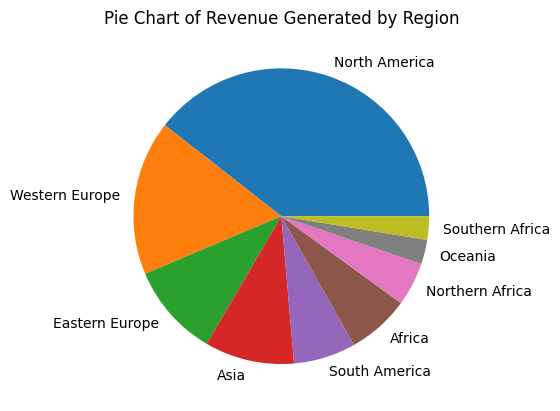

In [ ]:
import matplotlib.pyplot as plt
region_data=fd["region"].value_counts()
print(region_data)
plt.pie(region_data,labels=region_data.index)
plt.title("Pie Chart of Revenue Generated by Region")
plt.show()



#### What percentage of our returning/new customers are making a purchase when they visit the site?

visitor_type
Returning_Visitor    0.795705
New_Visitor          0.198533
Other                0.005762
Name: count, dtype: float64


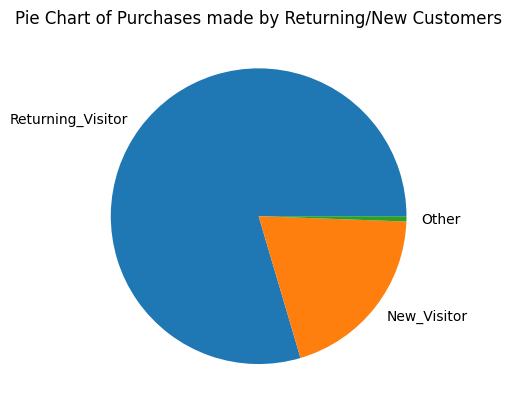

In [44]:
visitor_data=fd["visitor_type"].value_counts()/len(fd)
print(visitor_data)
plt.pie(visitor_data,labels=visitor_data.index)
plt.title("Pie Chart of Purchases made by Returning/New Customers")
plt.show()


#### Are sales being made more on weekends comparatively to weekdays?

weekday    1477
weekend     432
Name: count, dtype: int64


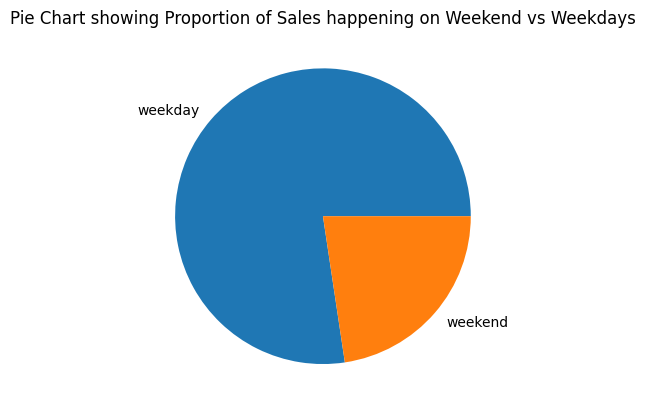

In [45]:
weekend_data=fd["weekend"].value_counts()
weekend_data.index=['weekday','weekend']
print(weekend_data)
plt.pie(weekend_data,labels=weekend_data.index)
plt.title("Pie Chart showing Proportion of Sales happening on Weekend vs Weekdays")
plt.show()


#### Which months have been the most effective for generating sales?

month
Nov     740
May     342
Dec     274
Mar     181
Oct     133
Aug      74
Sep      71
Jul      67
June     21
Feb       6
Name: count, dtype: int64


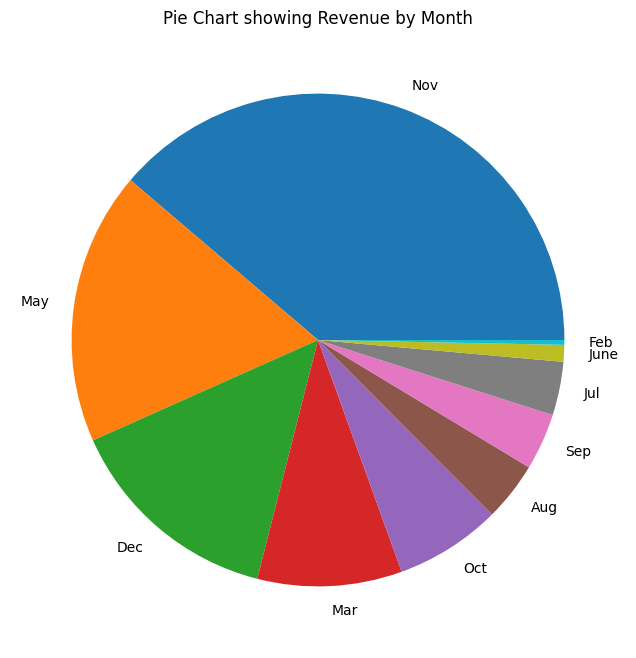

In [46]:
month_data=fd["month"].value_counts()
print(month_data)
plt.figure(figsize=(8,8))
plt.pie(month_data,labels=month_data.index)
plt.title("Pie Chart showing Revenue by Month")
plt.show()

#### Is direct/social or advertising traffic contributing heavily to sales?

category
Advertising    1665
Social          215
Direct           27
Other             2
Name: count, dtype: int64


C:\Users\Nisha\AppData\Local\Temp\ipykernel_14620\1762615441.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['category']=fd['traffic_type'].map(category_mapping)


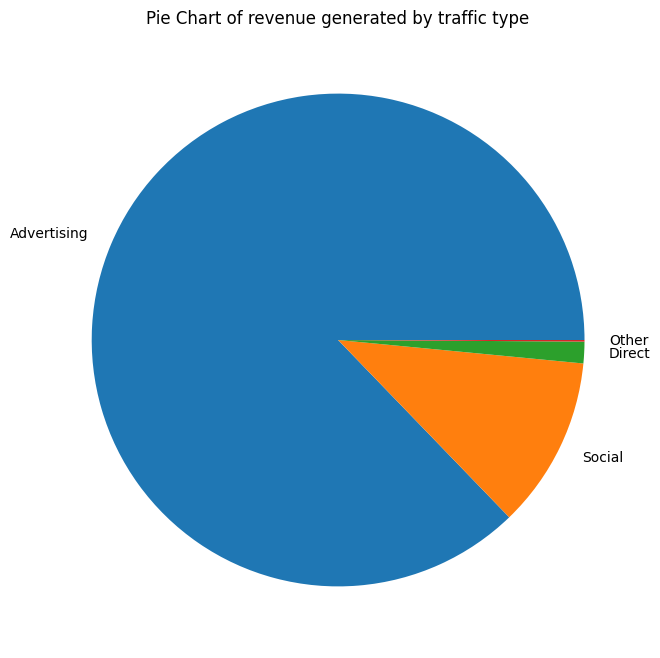

In [47]:
fd.head()
fd['traffic_type'].value_counts()
category_mapping = {
    'Direct Traffic': 'Direct',
    'Newsletter': 'Direct',
    'Google search': 'Advertising',
    'Bing search': 'Advertising',
    'Yahoo Search': 'Advertising',
    'Affiliate marketing': 'Advertising',
    'Facebook ads': 'Advertising',
    'Instagram ads': 'Advertising',
    'Youtube ads': 'Advertising',
    'Tik Tok ads': 'Advertising',
    'Facebook page': 'Social',
    'Instagram Page': 'Social',
    'Tik Tok page': 'Social',
    'Twitter': 'Social',
    'Youtube channel': 'Social',
    'Pinterest': 'Social',
    'Other': 'Other',  
    'Yandex search': 'Advertising'}

fd['category']=fd['traffic_type'].map(category_mapping)
traffic_data=fd['category'].value_counts()
print(traffic_data)
plt.figure(figsize=(8,8))
plt.pie(traffic_data,labels=traffic_data.index)
plt.title("Pie Chart of revenue generated by traffic type")
plt.show()







